#Team Name: Energetik

#Load Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

#Forecasting Monthly Usage Bills for Users using Time Series Analysis and modelling
Data Source: https://www.ausgrid.com.au/Industry/Our-Research/Data-to-share/Average-electricity-use

In [2]:
data = pd.read_csv("Forecast_MonthlyUsage_Bill.csv")

In [3]:
data['MONTH']= pd.to_datetime(data['MONTH'])
data

,MONTH,ENERGY,BILL
0,2020-01-01,310.2,103.3828
1,2020-02-01,240.1,88.3814
2,2020-03-01,272.7,95.3578
3,2020-04-01,378.8,118.0632
4,2020-05-01,263.5,93.3890
5,2020-06-01,293.4,99.7876
6,2020-07-01,210.7,82.0898
7,2020-08-01,224.8,85.1072
8,2020-09-01,198.4,79.4576
9,2020-10-01,200.1,79.8214


In [4]:
data.set_index('MONTH', inplace=True)
data.head()

,ENERGY,BILL
MONTH,,
2020-01-01,310.2,103.3828
2020-02-01,240.1,88.3814
2020-03-01,272.7,95.3578
2020-04-01,378.8,118.0632
2020-05-01,263.5,93.3890


In [5]:
data = data.drop(labels='BILL', axis=1)
data

,ENERGY
MONTH,
2020-01-01,310.2
2020-02-01,240.1
2020-03-01,272.7
2020-04-01,378.8
2020-05-01,263.5
2020-06-01,293.4
2020-07-01,210.7
2020-08-01,224.8
2020-09-01,198.4


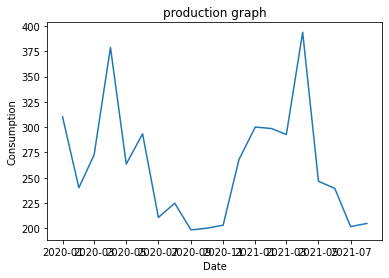

In [6]:
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(data)

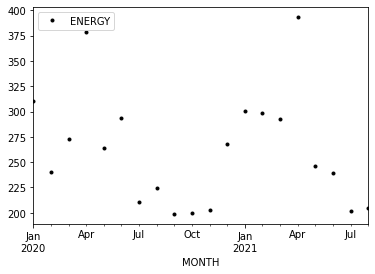

In [7]:
data.plot(style='k.')
plt.show()

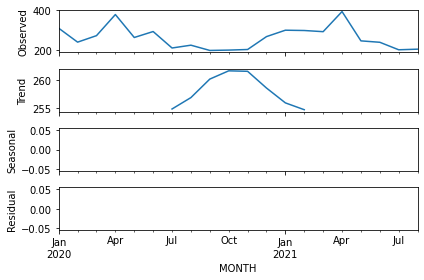

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

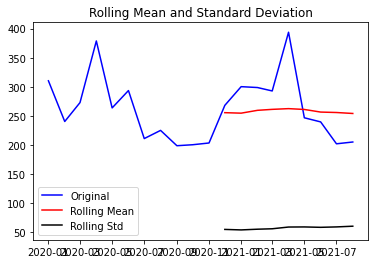

Results of dickey fuller test
Test Statistics                -1.864689
p-value                         0.348850
No. of lags used                8.000000
Number of observations used    11.000000
critical value (1%)            -4.223238
critical value (5%)            -3.189369
critical value (10%)           -2.729839
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(data['ENERGY'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data)

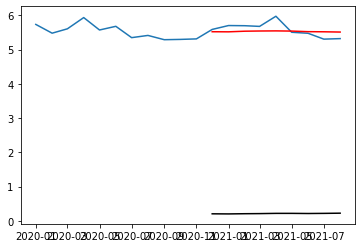

In [10]:
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

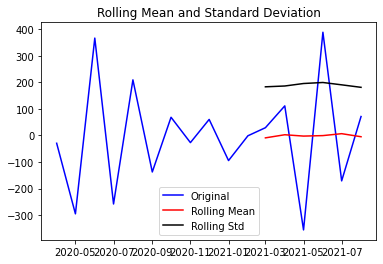

Results of dickey fuller test
Test Statistics                -1.864689
p-value                         0.348850
No. of lags used                8.000000
Number of observations used    11.000000
critical value (1%)            -4.223238
critical value (5%)            -3.189369
critical value (10%)           -2.729839
dtype: float64


In [11]:
df = data
df = df - df.shift(1)
df = df - df.shift(1)
df = df - df.shift(1)
df .dropna(inplace=True)
test_stationarity(df)


In [12]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

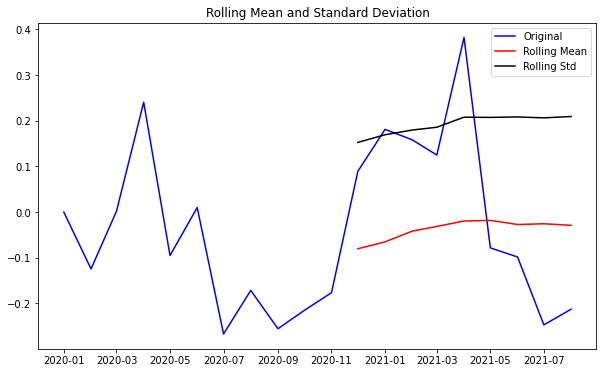

Results of dickey fuller test
Test Statistics                -1.864689
p-value                         0.348850
No. of lags used                8.000000
Number of observations used    11.000000
critical value (1%)            -4.223238
critical value (5%)            -3.189369
critical value (10%)           -2.729839
dtype: float64


In [13]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

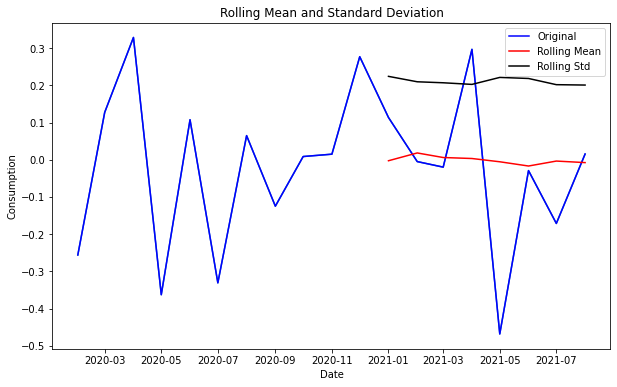

Results of dickey fuller test
Test Statistics                -1.864689
p-value                         0.348850
No. of lags used                8.000000
Number of observations used    11.000000
critical value (1%)            -4.223238
critical value (5%)            -3.189369
critical value (10%)           -2.729839
dtype: float64


In [14]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

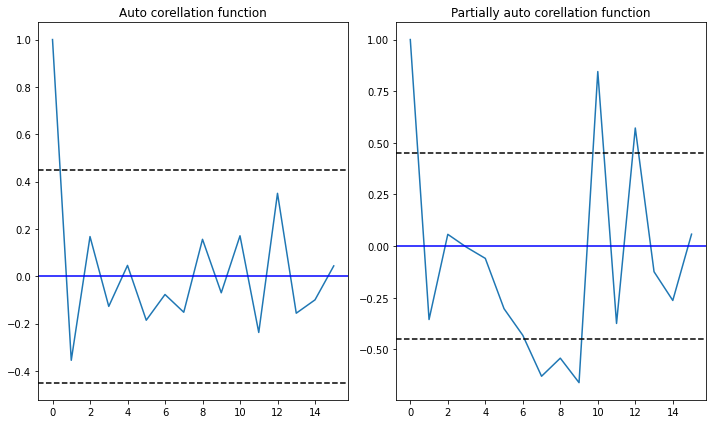

In [15]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS : nan


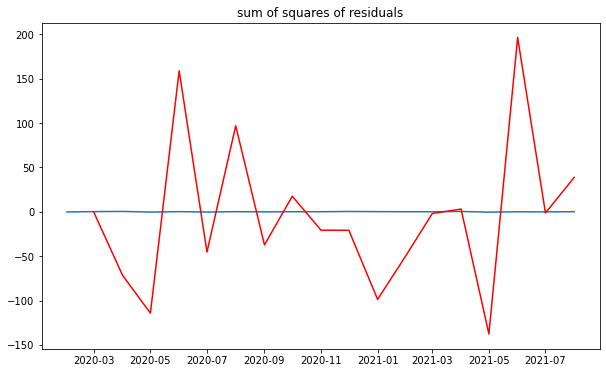

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(2,2,1))
result_AR = model.fit(disp = 1)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["ENERGY"])**2))

In [17]:
result_AR

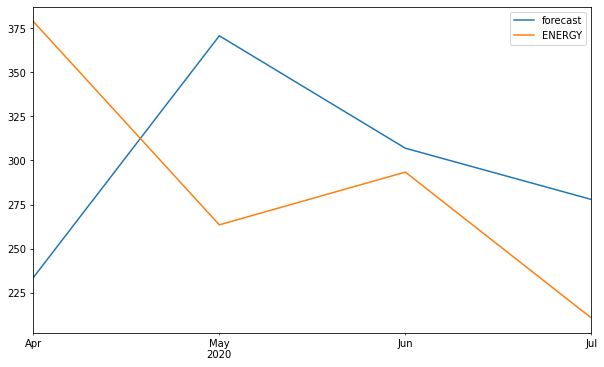

In [18]:
result_AR.plot_predict(3,6)
x=result_AR.forecast(steps=1)

In [19]:
#model=AR(df1['#Passengers'])
#ARfit=model.fit(maxlag=None)
forecasted_values=result_AR.predict(start=len(data),end=len(data)+3).rename('Forecast')

In [20]:
forecasted_values

2021-09-01   -18.278058
2021-10-01     6.235633
2021-11-01    -3.146857
2021-12-01     0.450297
Freq: MS, Name: Forecast, dtype: float64

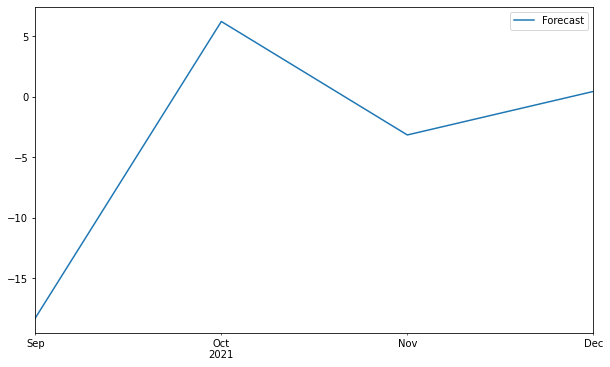

In [21]:
#data['Kwh'].plot(legend=True,figsize=(12,10))
forecasted_values.plot(legend=True)

#PRICE VS DEMAND ANALYSIS
Data Source: https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

In [22]:
data2 = pd.read_csv("PRICE_AND_DEMAND_202108_NSW1.csv")
data2.head(10)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2021/08/01 00:30:00,7488.85,70.92,TRADE
1,NSW1,2021/08/01 01:00:00,7270.30,56.55,TRADE
2,NSW1,2021/08/01 01:30:00,7045.65,55.57,TRADE
3,NSW1,2021/08/01 02:00:00,6813.62,48.83,TRADE
4,NSW1,2021/08/01 02:30:00,6557.80,37.00,TRADE
5,NSW1,2021/08/01 03:00:00,6344.56,37.11,TRADE
6,NSW1,2021/08/01 03:30:00,6205.17,33.26,TRADE
7,NSW1,2021/08/01 04:00:00,6088.15,13.88,TRADE
8,NSW1,2021/08/01 04:30:00,6070.19,16.88,TRADE
9,NSW1,2021/08/01 05:00:00,6094.45,35.77,TRADE


In [23]:
data2.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [24]:
data2['REGION'].unique()

array(['NSW1'], dtype=object)

In [25]:
data2['PERIODTYPE'].unique()

array(['TRADE'], dtype=object)

In [26]:
data2[['DATE','TIME']] = data2.SETTLEMENTDATE.str.split(" ",expand=True,)
data2


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,DATE,TIME
0,NSW1,2021/08/01 00:30:00,7488.85,70.92,TRADE,2021/08/01,00:30:00
1,NSW1,2021/08/01 01:00:00,7270.30,56.55,TRADE,2021/08/01,01:00:00
2,NSW1,2021/08/01 01:30:00,7045.65,55.57,TRADE,2021/08/01,01:30:00
3,NSW1,2021/08/01 02:00:00,6813.62,48.83,TRADE,2021/08/01,02:00:00
4,NSW1,2021/08/01 02:30:00,6557.80,37.00,TRADE,2021/08/01,02:30:00
...,...,...,...,...,...,...,...
1003,NSW1,2021/08/21 22:00:00,7922.53,119.04,TRADE,2021/08/21,22:00:00
1004,NSW1,2021/08/21 22:30:00,7818.79,97.52,TRADE,2021/08/21,22:30:00
1005,NSW1,2021/08/21 23:00:00,7720.42,88.18,TRADE,2021/08/21,23:00:00
1006,NSW1,2021/08/21 23:30:00,7590.88,78.52,TRADE,2021/08/21,23:30:00


In [27]:
data2[['HOUR','MIN','SEC']] = data2.TIME.str.split(":",expand=True,)
data2

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,DATE,TIME,HOUR,MIN,SEC
0,NSW1,2021/08/01 00:30:00,7488.85,70.92,TRADE,2021/08/01,00:30:00,00,30,00
1,NSW1,2021/08/01 01:00:00,7270.30,56.55,TRADE,2021/08/01,01:00:00,01,00,00
2,NSW1,2021/08/01 01:30:00,7045.65,55.57,TRADE,2021/08/01,01:30:00,01,30,00
3,NSW1,2021/08/01 02:00:00,6813.62,48.83,TRADE,2021/08/01,02:00:00,02,00,00
4,NSW1,2021/08/01 02:30:00,6557.80,37.00,TRADE,2021/08/01,02:30:00,02,30,00
...,...,...,...,...,...,...,...,...,...,...
1003,NSW1,2021/08/21 22:00:00,7922.53,119.04,TRADE,2021/08/21,22:00:00,22,00,00
1004,NSW1,2021/08/21 22:30:00,7818.79,97.52,TRADE,2021/08/21,22:30:00,22,30,00
1005,NSW1,2021/08/21 23:00:00,7720.42,88.18,TRADE,2021/08/21,23:00:00,23,00,00
1006,NSW1,2021/08/21 23:30:00,7590.88,78.52,TRADE,2021/08/21,23:30:00,23,30,00


In [28]:
temp_data2 = data2.groupby(['DATE', 'HOUR']).agg({'TOTALDEMAND':'sum','RRP':'sum'}).reset_index()
temp_data2

,DATE,HOUR,TOTALDEMAND,RRP
0,2021/08/01,00,7488.85,70.92
1,2021/08/01,01,14315.95,112.12
2,2021/08/01,02,13371.42,85.83
3,2021/08/01,03,12549.73,70.37
4,2021/08/01,04,12158.34,30.76
...,...,...,...,...
500,2021/08/21,20,16627.97,165.81
501,2021/08/21,21,16199.70,215.38
502,2021/08/21,22,15741.32,216.56
503,2021/08/21,23,15311.30,166.70


In [29]:
temp_data2["DATE_WITH_HOUR"] = temp_data2["DATE"] +" "+temp_data2["HOUR"]+":00:00"
temp_data2

,DATE,HOUR,TOTALDEMAND,RRP,DATE_WITH_HOUR
0,2021/08/01,00,7488.85,70.92,2021/08/01 00:00:00
1,2021/08/01,01,14315.95,112.12,2021/08/01 01:00:00
2,2021/08/01,02,13371.42,85.83,2021/08/01 02:00:00
3,2021/08/01,03,12549.73,70.37,2021/08/01 03:00:00
4,2021/08/01,04,12158.34,30.76,2021/08/01 04:00:00
...,...,...,...,...,...
500,2021/08/21,20,16627.97,165.81,2021/08/21 20:00:00
501,2021/08/21,21,16199.70,215.38,2021/08/21 21:00:00
502,2021/08/21,22,15741.32,216.56,2021/08/21 22:00:00
503,2021/08/21,23,15311.30,166.70,2021/08/21 23:00:00


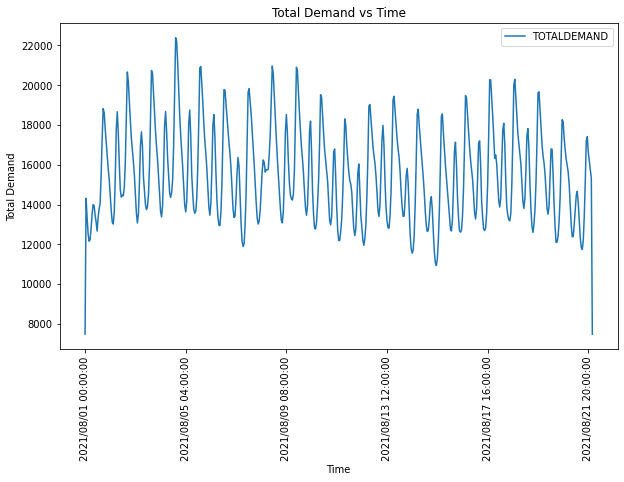

In [30]:
temp_data2.plot(x='DATE_WITH_HOUR', y='TOTALDEMAND',
           xlabel='Time',ylabel='Total Demand', title='Total Demand vs Time')
plt.xticks(rotation = 90)
plt.show()

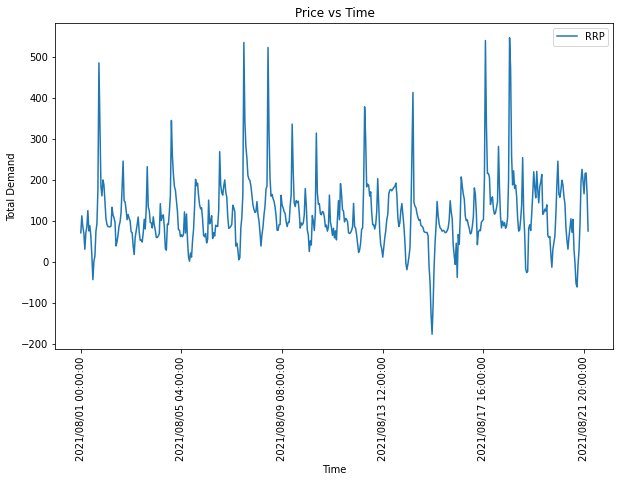

In [31]:
temp_data2.plot(x='DATE_WITH_HOUR', y='RRP',
           xlabel='Time',ylabel='Total Demand', title='Price vs Time')
plt.xticks(rotation = 90)
plt.show()

#Prediction Temperature Using other Weather Factors,
# which is later used for Energy Prediction
Data Source:
BOM has a weather station at Redcliffe which can be accessed for free via BOM.gov.au
https://datahub.moretonbay.qld.gov.au



In [32]:
import json
# Opening JSON file
f = open('moretonbay_qld.json',)
  
# returns JSON object as 
# a dictionary
json_file = json.load(f)
  
# Iterating through the json
# list
#for i in data4['emp_details']:
#    print(i)
  
# Closing file
f.close()
json_file['observations']['data']

[{'aifstime_utc': '20210822000000',
  'air_temp': 21.5,
  'apparent_t': 21.4,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 4.4,
  'dewpt': 13.9,
  'gust_kmh': 9,
  'gust_kt': 5,
  'history_product': 'IDQ60901',
  'lat': -27.2,
  'local_date_time': '22/10:00am',
  'local_date_time_full': '20210822100000',
  'lon': 153.1,
  'name': 'Redcliffe',
  'press': 1023.8,
  'press_msl': 1023.8,
  'press_qnh': 1023.8,
  'press_tend': '-',
  'rain_trace': '0.0',
  'rel_hum': 62,
  'sea_state': '-',
  'sort_order': 0,
  'swell_dir_worded': '-',
  'swell_height': None,
  'swell_period': None,
  'vis_km': '-',
  'weather': '-',
  'wind_dir': 'SE',
  'wind_spd_kmh': 7,
  'wind_spd_kt': 4,
  'wmo': 95591},
 {'aifstime_utc': '20210821233000',
  'air_temp': 21.1,
  'apparent_t': 20.1,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 4.5,
  'dewpt': 13.3,
  '

In [33]:
json_file2 = json_file['observations']['data']
json_file2

[{'aifstime_utc': '20210822000000',
  'air_temp': 21.5,
  'apparent_t': 21.4,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 4.4,
  'dewpt': 13.9,
  'gust_kmh': 9,
  'gust_kt': 5,
  'history_product': 'IDQ60901',
  'lat': -27.2,
  'local_date_time': '22/10:00am',
  'local_date_time_full': '20210822100000',
  'lon': 153.1,
  'name': 'Redcliffe',
  'press': 1023.8,
  'press_msl': 1023.8,
  'press_qnh': 1023.8,
  'press_tend': '-',
  'rain_trace': '0.0',
  'rel_hum': 62,
  'sea_state': '-',
  'sort_order': 0,
  'swell_dir_worded': '-',
  'swell_height': None,
  'swell_period': None,
  'vis_km': '-',
  'weather': '-',
  'wind_dir': 'SE',
  'wind_spd_kmh': 7,
  'wind_spd_kt': 4,
  'wmo': 95591},
 {'aifstime_utc': '20210821233000',
  'air_temp': 21.1,
  'apparent_t': 20.1,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 4.5,
  'dewpt': 13.3,
  '

In [34]:
#data4 =  pd.read_json(json_file['observations']['data']
data5 = pd.json_normalize(json_file['observations']['data'])
data5

,sort_order,wmo,name,history_product,local_date_time,local_date_time_full,aifstime_utc,lat,lon,apparent_t,cloud,cloud_base_m,cloud_oktas,cloud_type_id,cloud_type,delta_t,gust_kmh,gust_kt,air_temp,dewpt,press,press_qnh,press_msl,press_tend,rain_trace,rel_hum,sea_state,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt
0,0,95591,Redcliffe,IDQ60901,22/10:00am,20210822100000,20210822000000,-27.2,153.1,21.4,-,None,None,None,-,4.4,9,5,21.5,13.9,1023.8,1023.8,1023.8,-,0.0,62,-,-,None,None,-,-,SE,7,4
1,1,95591,Redcliffe,IDQ60901,22/09:30am,20210822093000,20210821233000,-27.2,153.1,20.1,-,None,None,None,-,4.5,13,7,21.1,13.3,1023.7,1023.7,1023.7,-,0.0,61,-,-,None,None,-,-,SSE,11,6
2,2,95591,Redcliffe,IDQ60901,22/09:00am,20210822090000,20210821230000,-27.2,153.1,19.3,-,None,None,None,-,4.1,13,7,20.4,13.1,1023.8,1023.8,1023.8,-,0.0,63,-,-,None,None,-,-,SSE,11,6
3,3,95591,Redcliffe,IDQ60901,22/08:30am,20210822083000,20210821223000,-27.2,153.1,18.7,-,None,None,None,-,3.0,9,5,18.9,13.7,1023.6,1023.6,1023.6,-,0.0,72,-,-,None,None,-,-,S,7,4
4,4,95591,Redcliffe,IDQ60901,22/08:00am,20210822080000,20210821220000,-27.2,153.1,16.1,-,None,None,None,-,2.2,13,7,16.9,13.0,1023.3,1023.3,1023.3,-,0.0,78,-,-,None,None,-,-,W,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,95591,Redcliffe,IDQ60901,19/12:30pm,20210819123000,20210819023000,-27.2,153.1,20.3,-,None,None,None,-,5.2,15,8,21.6,12.5,1023.1,1023.1,1023.1,-,0.0,56,-,-,None,None,-,-,SSE,11,6
140,140,95591,Redcliffe,IDQ60901,19/12:00pm,20210819120000,20210819020000,-27.2,153.1,19.3,-,None,None,None,-,5.2,15,8,21.2,11.8,1023.7,1023.7,1023.7,-,0.0,55,-,-,None,None,-,-,SSE,13,7
141,141,95591,Redcliffe,IDQ60901,19/11:30am,20210819113000,20210819013000,-27.2,153.1,18.6,-,None,None,None,-,4.9,17,9,20.8,12.0,1024.0,1024.0,1024.0,-,0.0,57,-,-,None,None,-,-,SSE,15,8
142,142,95591,Redcliffe,IDQ60901,19/11:00am,20210819110000,20210819010000,-27.2,153.1,19.2,-,None,None,None,-,4.8,19,10,21.2,12.6,1024.5,1024.5,1024.5,-,0.0,58,-,-,None,None,-,-,S,15,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe09971ed50>,
      dtype=object)

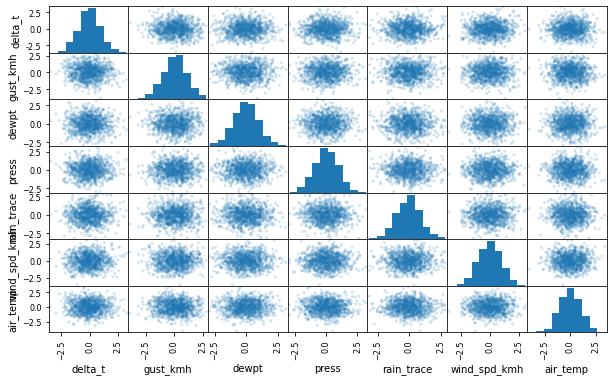

In [35]:
df = pd.DataFrame(np.random.randn(1000, 7), columns=['delta_t','gust_kmh','dewpt','press','rain_trace','wind_spd_kmh','air_temp'])
pd.plotting.scatter_matrix(df, alpha=0.2)

In [36]:
from sklearn import linear_model
X = data5[['delta_t','gust_kmh','dewpt','press','rain_trace','wind_spd_kmh']]
y = data5['air_temp']

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [38]:
predictions = lm.predict(X)
print(predictions)

[21.59876576 21.24259082 20.36189707 18.96068026 16.9185167  15.5194634
 13.5761949  12.75726142 12.73975561 13.09395746 13.33929165 13.24944506
 14.05273452 14.19063629 14.10778227 14.31556375 14.48721355 16.88952348
 18.17669141 18.18291795 18.64581304 18.78618465 19.0722299  18.8867834
 18.72842013 18.70067049 18.44166537 18.7204468  19.14861045 19.15509746
 19.49894232 19.92111559 20.24756502 20.75790274 21.04679605 21.77004264
 22.24582384 22.45954184 22.46896116 22.89657155 22.23477429 21.58400319
 21.41355769 21.68873855 21.85984585 22.43031635 21.5310075  20.91418644
 20.37161657 20.74280328 19.49900931 17.3942979  15.7194997  14.29850382
 12.94947787 12.4828709  12.5788552  12.56346981 12.81186209 12.87797633
 13.08813871 13.26575734 13.35388947 13.66480684 13.84932921 14.11427886
 14.11891486 14.58860145 15.08296818 15.43875872 15.1797536  15.72310028
 15.89820333 16.52585802 17.2516202  17.59026501 18.31737881 18.67197306
 18.72241712 18.79265904 18.98012634 19.24909328 19.7

In [39]:
lm.score(X,y)

0.9992919109706844

In [86]:
lm.coef_

array([ 1.75103051, -0.00279761,  0.91200979,  0.02120414,  0.        ,
        0.00730968])

In [87]:
lm.intercept_

-20.51749345315555

#Finding the relationship between energy consumption and weather condition like air temperature
Data Source:
https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather?select=energy_dataset.csv

In [40]:
energy_data = pd.read_csv("energy_dataset.csv")
weather_data = pd.read_csv("weather_features.csv")

In [41]:
energy_data.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,NaN,2109.0,952.0,743.0,0.0,7098.0,43.0,74.0,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,NaN,2108.0,961.0,848.0,0.0,7098.0,43.0,74.0,34.0,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,NaN,2031.0,983.0,1012.0,0.0,7099.0,43.0,72.0,35.0,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,NaN,2119.0,1001.0,1015.0,0.0,7098.0,43.0,73.0,54.0,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,NaN,2170.0,1041.0,1357.0,0.0,7097.0,43.0,74.0,743.0,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [ ]:
weather_data.head(10)

In [44]:
energy_data.shape

(35064, 29)

In [45]:
energy_data.time.min(),energy_data.time.max()

('2015-01-01 00:00:00+01:00', '2018-12-31 23:00:00+01:00')

In [46]:
weather_data.query("city_name == 'Valencia' ").head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [47]:
def miss_frame(data):
    frame=pd.DataFrame()
    frame["missing_no"]=data.isnull().sum()
    frame["missing_rate"]=data.isnull().sum()/len(data)
    frame=frame.loc[frame["missing_rate"]>0].sort_values(by="missing_rate",
                                                         ascending=False)
    frame["bigger_005"]=frame["missing_rate"].map(lambda x:1 if x>=0.05 else 0)
    return frame

miss_frame(energy_data)

,missing_no,missing_rate,bigger_005
generation hydro pumped storage aggregated,35064,1.000000,1
forecast wind offshore eday ahead,35064,1.000000,1
total load actual,36,0.001027,0
generation waste,19,0.000542,0
generation marine,19,0.000542,0
generation hydro pumped storage consumption,19,0.000542,0
generation biomass,19,0.000542,0
generation fossil oil,19,0.000542,0
generation hydro run-of-river and poundage,19,0.000542,0
generation fossil peat,18,0.000513,0


SyntaxError: ignored

In [51]:
miss_frame(energy_data)

,missing_no,missing_rate,bigger_005
generation hydro pumped storage aggregated,35064,1.000000,1
forecast wind offshore eday ahead,35064,1.000000,1
total load actual,36,0.001027,0
generation waste,19,0.000542,0
generation marine,19,0.000542,0
generation hydro pumped storage consumption,19,0.000542,0
generation biomass,19,0.000542,0
generation fossil oil,19,0.000542,0
generation hydro run-of-river and poundage,19,0.000542,0
generation fossil peat,18,0.000513,0


In [85]:
import missingno as msno

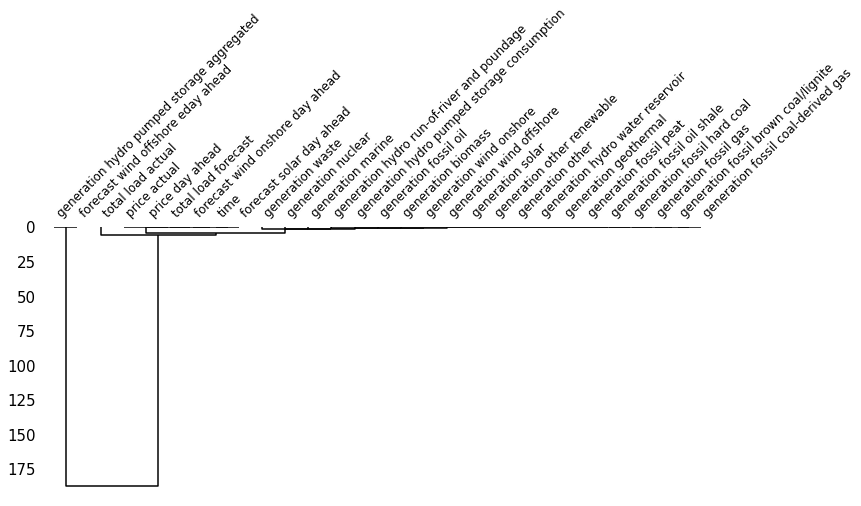

In [54]:
msno.dendrogram(df=energy_data,figsize=(12,5),fontsize=12);

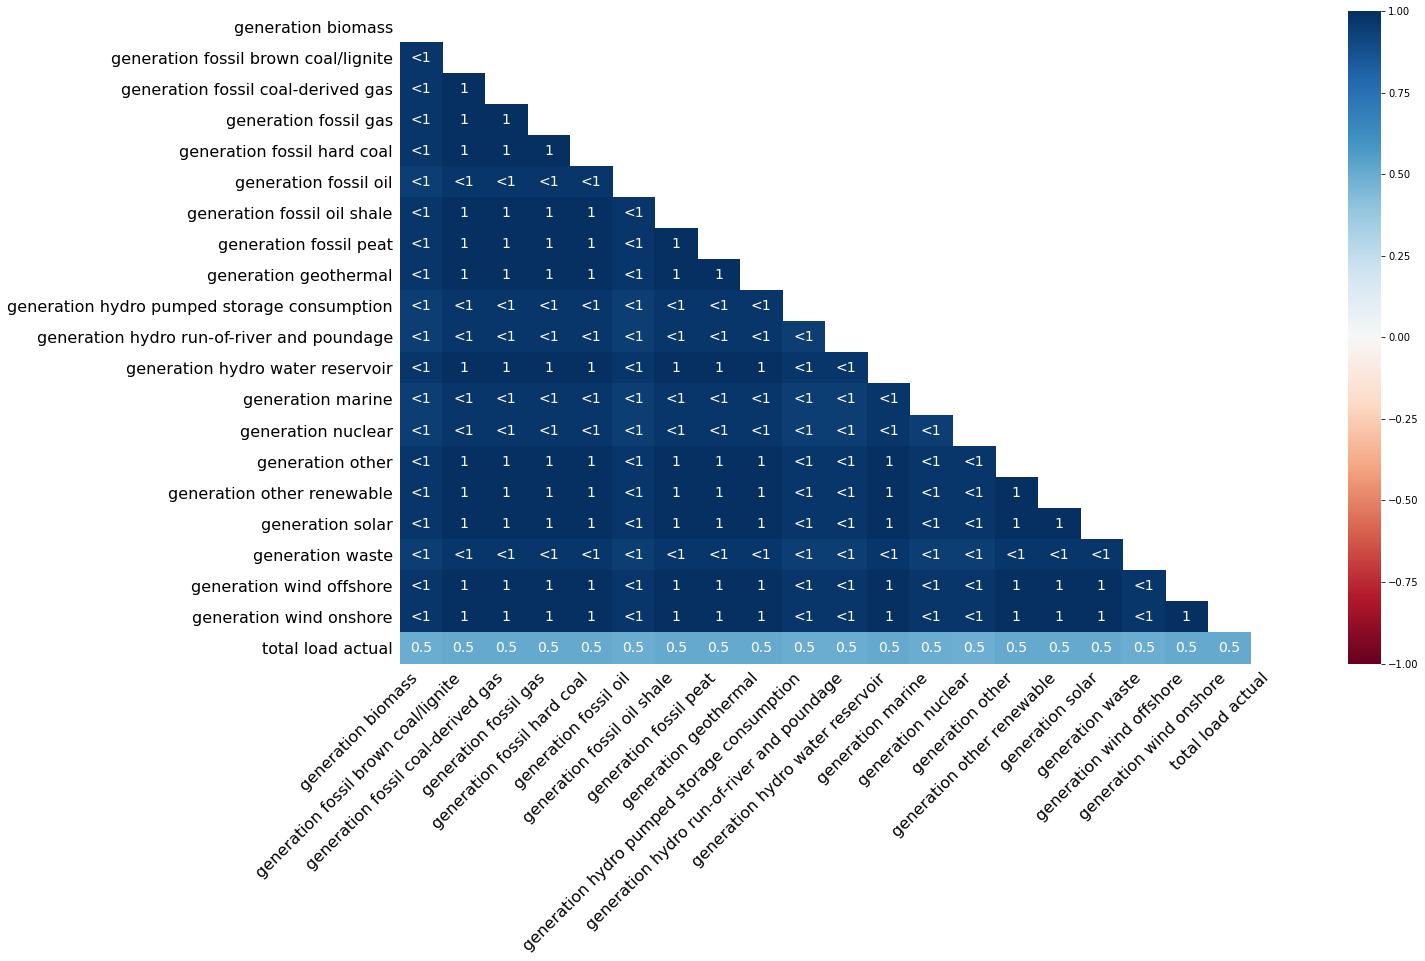

In [55]:
msno.heatmap(df=energy_data);

In [76]:
weather_val=weather_data.query("city_name == 'Valencia'")

weather_val.shape, energy_data.shape

((35145, 17), (35064, 29))

In [77]:
weather_val[weather_val.duplicated(subset="dt_iso",
                                   keep="first")].shape

(81, 17)

In [78]:
weather_val=weather_val.rename({"dt_iso":"time"},axis=1)

In [79]:
full_df=pd.merge(energy_data,weather_val,on="time")
full_df.shape

(35145, 45)

In [80]:
full_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [81]:
dates = full_df["time"].str.split(" ",n=1,expand=True)[0]
times = full_df["time"].str.split(" ",n=1,expand=True)[1]

full_df["date"] = dates
full_df["hours"] = times.str.split("+",n=1,expand=True)[0]

full_df["full_time"]=full_df["date"] + " " + full_df["hours"]

full_df["full_time"]=pd.to_datetime(full_df["full_time"],
                                    format='%Y-%m-%d %H:%M')

full_df["full_time"].head()

0   2015-01-01 00:00:00
1   2015-01-01 01:00:00
2   2015-01-01 02:00:00
3   2015-01-01 03:00:00
4   2015-01-01 04:00:00
Name: full_time, dtype: datetime64[ns]

In [82]:
def extract_from_date(data,time_column):
    
    data["year"]=data[time_column].dt.year
    data["quarter"]=data[time_column].dt.quarter
    data["month"]=data[time_column].dt.month
    data["week"]=data[time_column].dt.week
    data["hour"]=data[time_column].dt.hour
    data["time"]=data[time_column].dt.time
    data['dayofweek'] = data[time_column].dt.dayofweek
    data["dayofmonth"]=data[time_column].dt.day
    data["day_name"]=data[time_column].dt.day_name()
    data['is_weekend'] = np.where(data['day_name'].isin(['Sunday', 'Saturday']), 1,0)
    data["is_year_start"]=data[time_column].dt.is_year_start
    
    return data

full_df=extract_from_date(full_df,"full_time")

full_df.sample(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,hours,full_time,year,quarter,month,week,hour,dayofweek,dayofmonth,day_name,is_weekend,is_year_start
23783,11:00:00,329.0,579.0,0.0,6057.0,2698.0,339.0,0.0,0.0,0.0,NaN,0.0,527.0,2060.0,0.0,6835.0,57.0,100.0,4342.0,311.0,0.0,4565.0,4160.0,NaN,4336.0,32536.0,32128.0,51.15,59.24,Valencia,294.150,294.150,294.150,1013,64,6,50,0.0,0.0,0.0,75,803,clouds,broken clouds,04d,2017-09-15,11:00:00,2017-09-15 11:00:00,2017,3,9,37,11,4,15,Friday,0,False
18675,03:00:00,363.0,302.0,0.0,4445.0,4175.0,284.0,0.0,0.0,0.0,NaN,2177.0,1425.0,777.0,0.0,7112.0,59.0,95.0,33.0,265.0,0.0,4684.0,8.0,NaN,4685.0,23867.0,23632.0,42.49,48.94,Valencia,275.582,275.582,275.582,999,81,1,329,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2017-02-15,03:00:00,2017-02-15 03:00:00,2017,1,2,7,3,2,15,Wednesday,0,False
19990,22:00:00,349.0,921.0,0.0,11351.0,4995.0,350.0,0.0,0.0,0.0,NaN,0.0,391.0,1707.0,0.0,5949.0,54.0,104.0,345.0,287.0,0.0,3390.0,300.0,NaN,3456.0,29366.0,30039.0,62.75,58.51,Valencia,289.150,289.150,289.150,1023,67,1,120,0.0,0.0,0.0,0,800,clear,sky is clear,01n,2017-04-10,22:00:00,2017-04-10 22:00:00,2017,2,4,15,22,0,10,Monday,0,False
17582,16:00:00,322.0,871.0,0.0,4234.0,6110.0,188.0,0.0,0.0,0.0,NaN,0.0,485.0,730.0,0.0,7102.0,58.0,101.0,2540.0,273.0,0.0,1510.0,2183.0,NaN,1527.0,26292.0,26696.0,57.50,64.69,Valencia,288.150,288.150,288.150,1031,51,0,0,0.0,0.0,0.0,20,801,clouds,few clouds,02d,2016-12-31,16:00:00,2016-12-31 16:00:00,2016,4,12,52,16,5,31,Saturday,1,False
3159,15:00:00,492.0,830.0,0.0,5894.0,7316.0,290.0,0.0,0.0,0.0,NaN,263.0,578.0,735.0,0.0,6090.0,87.0,72.0,3037.0,234.0,0.0,2489.0,2575.0,NaN,2490.0,27257.0,27787.0,56.70,62.39,Valencia,301.647,301.647,301.647,994,30,2,131,0.0,0.0,0.0,0,800,clear,sky is clear,01d,2015-05-12,15:00:00,2015-05-12 15:00:00,2015,2,5,20,15,1,12,Tuesday,0,False


In [83]:
train=full_df.loc[~((full_df["year"]==2018) & (full_df["month"]==12))]

test=full_df.loc[((full_df["year"]==2018) & (full_df["month"]==12))] 

In [84]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots()

fig.add_trace(
    go.Line(x=train.loc[train["year"]==2018,"full_time"],
            y=train.loc[train["year"]==2018,"price actual"],
                                name="price actual"))

fig.add_trace(
    go.Line(x=train.loc[train["year"]==2018,"full_time"],
            y=train.loc[train["year"]==2018,"temp"],
                                name="Temp"))
fig.add_trace(
    go.Line(x=train.loc[train["year"]==2018,"full_time"],
            y=train.loc[train["year"]==2018,"generation waste"],
                                name="generation waste"))
fig.add_trace(
    go.Line(x=train.loc[train["year"]==2018,"full_time"],
            y=train.loc[train["year"]==2018,"generation fossil oil"],
                                name="generation fossil oil"))

fig.update_xaxes(rangeslider_visible=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated

In [84]:
#LGA